## Baseline model


In [138]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("data/Train.csv")


In [130]:
X = df.drop("target", axis=1)
y = df.target


In [131]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

(80874,)
(80874,)
[48.70855899 48.70855899 48.70855899 ... 48.70855899 48.70855899
 48.70855899]


In [132]:
# score for train data
y_baseline_pred_train = np.full(y_train.shape, y_train.mean())
rmse_baseline_train = mean_squared_error(y_train, y_baseline_pred_train, squared=False)
r2_baseline_train = r2_score(y_train, y_baseline_pred_train)
mae_baseline_train = mean_absolute_error(y_train, y_baseline_pred_train)
mape_baseline_train = mean_absolute_percentage_error(y_train, y_baseline_pred_train)
# score for test data
y_baseline_pred_test = np.full(y_test.shape, y_train.mean())
rmse_baseline_test = mean_squared_error(y_test, y_baseline_pred_test, squared=False)
r2_baseline_test = r2_score(y_test, y_baseline_pred_test)
mae_baseline_test = mean_absolute_error(y_test, y_baseline_pred_test)
mape_baseline_test = mean_absolute_percentage_error(y_test, y_baseline_pred_test)


print("BASELINE SCORES")
print("TRAIN SCORE")
print(f"RMSE: {rmse_baseline_train}")
print(f"r2: {r2_baseline_train}")
print(f"MAE: {mae_baseline_train}")
print(f"MAPE: {mape_baseline_train}")
print()
print("TEST SCORE")
print(f"RMSE: {rmse_baseline_test}")
print(f"r2: {r2_baseline_test}")
print(f"MAE: {mae_baseline_test}")
print(f"MAPE: {mape_baseline_test}")

BASELINE SCORES
TRAIN SCORE
RMSE: 116.48037731214279
r2: 0.0
MAE: 57.84372129127852
MAPE: 7.784088475471685e+16

TEST SCORE
RMSE: 119.0772905926916
r2: -6.747475365109779e-07
MAE: 57.87489627065087
MAPE: 7.70568508400577e+16


In [133]:
y_test_pred_bool = np.where(y_baseline_pred_test > 0, 1, 0)
y_test_bool = np.where(y_test > 0, 1, 0)

In [134]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test_bool, y_test_pred_bool))
confusion_matrix(y_test_bool, y_test_pred_bool)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9470
           1       0.65      1.00      0.79     17489

    accuracy                           0.65     26959
   macro avg       0.32      0.50      0.39     26959
weighted avg       0.42      0.65      0.51     26959



array([[    0,  9470],
       [    0, 17489]])

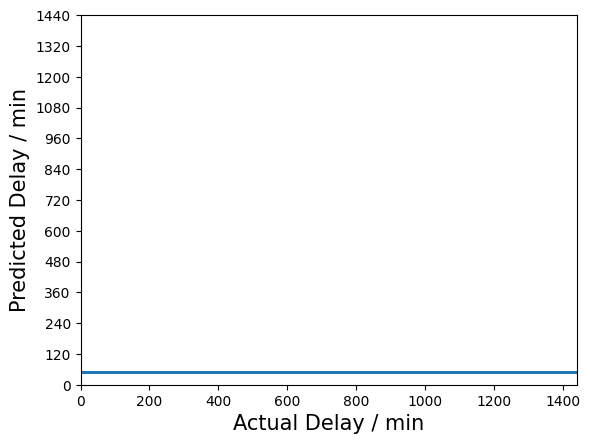

In [136]:
plt.plot(y_test, y_baseline_pred_test)
# plt.plot(y_test,y_test,'.')
plt.ylim(0, 60)
plt.xlim(0, 1440)
plt.xlabel("Actual Delay / min", fontsize=15)
plt.ylabel("Predicted Delay / min", fontsize=15)
# plt.xscale('log')
plt.yticks(list(range(0, 1500, 120)))
plt.show()

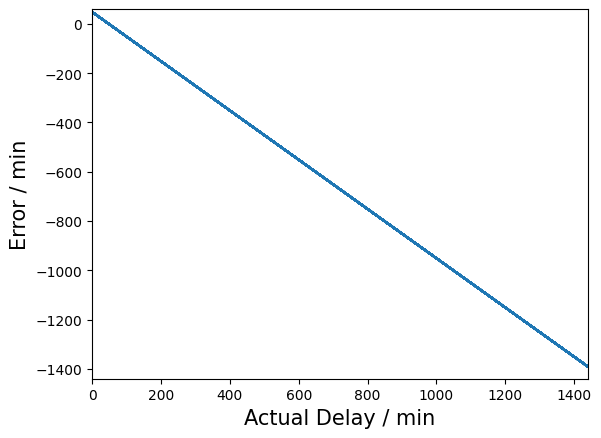

In [137]:
plt.plot(y_test, (y_baseline_pred_test - y_test))
plt.ylim(-1440, 60)
plt.xlim(0, 1440)
plt.xlabel("Actual Delay / min", fontsize=15)
plt.ylabel("Error / min", fontsize=15)
plt.show()